In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import coins
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import label, closing, square
from skimage.measure import regionprops
from skimage.color import lab2rgb
%matplotlib inline

In [2]:
def show(img, cmap=None):
    cmap = cmap or plt.cm.gray
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap=cmap)
    ax.set_axis_off()
    plt.show()

In [3]:
import cv2 as cv
def preprocess():
 img = cv.imread('93_sobel_x.png')
 img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 cv.imwrite('img001_otsu.png',img)
 #img = img[100:485, 120:620]
 t = threshold_otsu(img)
 #img = img < t
 img_bin = clear_border(closing(img > t, square(1)))
 labels = label(img_bin)
 show(labels, cmap=plt.cm.rainbow)
 regions = regionprops(labels)
 return img_bin, labels, regions

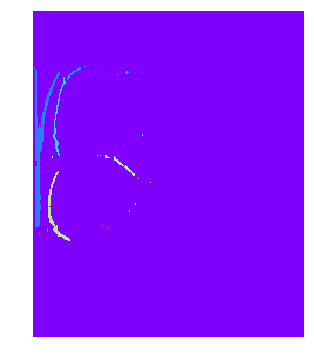

In [4]:
img_bin, labels, regions = preprocess()

In [5]:
cv.imwrite('93_sobel_x_bin.png',img_bin)

TypeError: img data type = 0 is not supported

In [6]:
#show(img)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
#img = cv.filter2D(img, -1, kernel_sharpening)
#show(img)
edges = cv.Canny(img,100,200)
#show(edges)

#show(img)

NameError: name 'img' is not defined

In [7]:
boxes_all = np.array([label['BoundingBox']
                  for label in regions])

In [8]:
print(labels==4)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [9]:
rows = []
n=0
for label in regions:
    n += 1
    row = [n, label['BoundingBox'], label['Area']]
    rows.append(row)

In [10]:
import pandas as pd
df = pd.DataFrame(rows,columns=['no','bounding_box','area'])

In [11]:
df.sort_values('area',ascending=False,inplace=True)

In [12]:
df

,no,bounding_box,area
3,4,"(49, 1, 186, 23)",587
14,15,"(138, 13, 198, 32)",154
7,8,"(57, 17, 125, 28)",105
13,14,"(125, 69, 142, 87)",44
4,5,"(49, 29, 60, 41)",27
11,12,"(124, 62, 127, 66)",7
5,6,"(52, 79, 55, 82)",6
0,1,"(46, 48, 49, 50)",4
20,21,"(187, 12, 190, 13)",3
22,23,"(190, 5, 192, 6)",2


In [13]:
mask = labels == 8

In [14]:
labels[mask] = 15

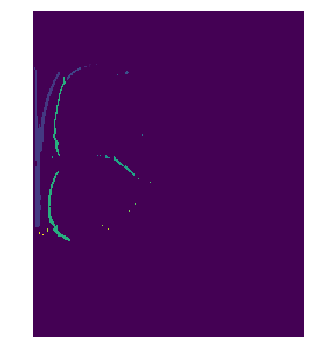

In [15]:
show(labels, cmap=plt.cm.viridis)

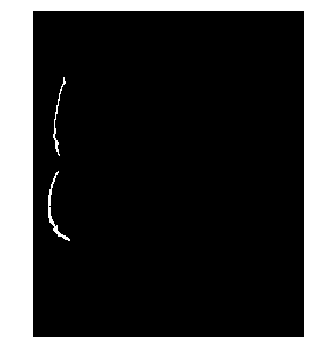

In [16]:
show(labels==15)

In [17]:
df_15 = pd.DataFrame(np.argwhere(labels==15), columns=['y','x'])

In [18]:
df_4 = pd.DataFrame(np.argwhere(labels==4), columns=['y','x'])

In [19]:
df_15_left = df_15.groupby('y').min().reset_index()
df_4_right = df_4.groupby('y').max().reset_index()

In [20]:
df_concat = pd.concat([df_4_right, df_15_left])

In [21]:
df_middle = df_concat.groupby('y').mean().reset_index()

In [22]:
df_middle['x'] = df_middle['x'].apply(round)
df_middle.to_csv('df_middle.csv',index=False)

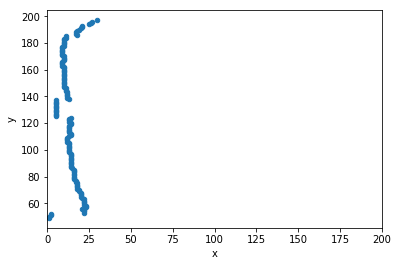

In [23]:
df_middle.plot(kind='scatter', x='x',y='y',xlim=(0,200))

In [24]:
from ipywidgets import widgets

@widgets.interact(t=(50, 240))
def threshold(t):
    show(img > t)

interactive(children=(IntSlider(value=145, description='t', max=240, min=50), Output()), _dom_classes=('widget…

In [25]:
#img.dtype='uint8'
cv.imwrite('img001_otsu.png',img)
cv.imwrite('mask.png', img.astype('uint8') * 255)

NameError: name 'img' is not defined

In [26]:
def segment_img(n,t=115):
 img = cv.imread('images/img%03d.jpeg' %n)
 img = img[100:480, 120:620]
 img[ 150:240,20:120,] = 255
 img[ 155:245,385:475,] = 255
 img[ 0:155,330:350,] = 255
 img[ 245:395,330:350,] = 255
 kernel = np.ones((3,3),np.uint8)
 #img = cv.filter2D(img, -1, kernel_sharpening)
 img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 print (threshold_otsu(closing(img, square(20))))
 img_bin = clear_border(closing(img < t, square(1)))
 img_bin2 = closing(img < t, square(20))
 '''
 show(img<t)
 show(img_bin)
 show(img_bin2)
 '''
 labels = label(img_bin2)
 #show(labels, cmap=plt.cm.rainbow)
 regions = regionprops(labels)
 boxes = np.array([label['BoundingBox']
                  for label in regions
                  if (label['Area'] < 1800 and label['Area'] > 1000)
                 ])
 boxes_all = np.array([label['BoundingBox']
                  for label in regions])
 print("There are %d coins." %len(boxes))
 '''
 fig, ax = plt.subplots(1, 1, figsize=(8, 6))
 ax.imshow(img, cmap=plt.cm.gray)
 ax.set_axis_off()
 '''
 # Get the coordinates of the boxes.
 xs = boxes_all[:, [1, 3]].mean(axis=1)
 ys = boxes_all[:, [0, 2]].mean(axis=1)
 '''
 for n in range(len(boxes_all)):
    ax.text(xs[n], ys[n],
                str(xs[n])+' '+str(ys[n]),
                fontsize=20)
 '''
 '''
 for n in range(len(boxes_all)):
    ax.text(xs[n], ys[n],
                str(regions[n]['Area']),
                fontsize=20)
 '''
 #take difference between images into account
 return regions, boxes

In [27]:
from tqdm import tqdm
boxess = []
for i in tqdm(range(1,601)):
    regions, boxes = segment_img(i,t=100)
    boxess.append([boxes])

  0%|          | 0/600 [00:00<?, ?it/s]


TypeError: 'NoneType' object is not subscriptable

In [28]:
import pickle
f = open('picklefile','wb')
pickle.dump(boxess, f)

In [29]:
boxess[0]

IndexError: list index out of range

In [30]:
import os
os.system('mkdir images_diff')
for i in range(2,601):
 image1= cv.imread('images/img%03d.jpeg' %i)
 image1 = np.int32(cv.cvtColor(image1,cv.COLOR_BGR2GRAY))
 image2= cv.imread('images/img%03d.jpeg' %(i-1))
 image2= np.int32(cv.cvtColor(image2,cv.COLOR_BGR2GRAY))
 image3 = image1 - image2
 show(image3)
 cv.imwrite('images_diff/img%03d.jpeg' %i,image3)   

error: OpenCV(3.4.2) /io/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


In [31]:
os.system('mkdir -p images_otsu_closed')
img_diff = cv.imread('images_diff/img%03d.jpeg' %2)
t = threshold_otsu(img_diff)
print(t)
t = 13
boxess = []
borders = [[0,276],[276,461],[461,1000]]
room_count = [0, 0, 0]
last_room = None
for i in tqdm(range(2,601)):
 img_diff = cv.imread('images_diff/img%03d.jpeg' %i)
 img_diff = cv.cvtColor(img_diff,cv.COLOR_BGR2GRAY)
 #t = threshold_otsu(img_diff)
 img = img_diff > t
 img = closing(img, square(20))
 labels = label(img)
 #show(labels, cmap=plt.cm.rainbow)
 regions = regionprops(labels)
 boxes = np.array([label['BoundingBox']
                  for label in regions
                  if (label['Area'] > 10)
                 ])
 if len(boxes) >= 1:     
  xs = boxes[:, [1, 3]].mean(axis=1)
 x = xs[0]
 show(img)
 show(labels, cmap=plt.cm.rainbow)
 for n in range(len(borders)):
  border = borders[n]    
  if (x >= border[0] and x < border[1]):
     room_count[n] += 1 
 boxess.append(boxes)
 boxes_all = np.array([label['BoundingBox']
                  for label in regions])

 cv.imwrite('images_otsu_closed/img%03d.jpeg' %i, img.astype('uint8') * 255)

#for boxes in boxess:
    
    # 
#t = 117
#combine otsu with diff-otsu
import pickle
f = open('boxess','wb')
pickle.dump({'boxess':boxess,'room_count':room_count}, f)

AttributeError: 'NoneType' object has no attribute 'shape'

In [32]:
print(sum(room_count))

NameError: name 'room_count' is not defined

In [33]:
print(t)
regions[2]['eccentricity']
for region in regions:
    print(region['Area'],region['eccentricity'])

NameError: name 't' is not defined

In [34]:
img_bin = clear_border(closing(img < 113, square(1)))
labels = label(img_bin)
show(labels, cmap=plt.cm.rainbow)
regions = regionprops(labels)

NameError: name 'img' is not defined

In [35]:

# We reorder the boxes by increasing
# column first, and row second.
'''
for row in range(4):
    # We select the coins in each of the four rows.
    if row < 3:
        ind = ((ys[6 * row] <= ys) &
               (ys < ys[6 * row + 6]))
    else:
        ind = (ys[6 * row] <= ys)
    # We reorder by increasing x coordinate.
    ind = np.nonzero(ind)[0]
    reordered = ind[np.argsort(xs[ind])]
    xs_row = xs[reordered]
    ys_row = ys[reordered]
    # We display the coin number.
    for col in range(6):
        n = 6 * row + col
        ax.text(xs_row[col] - 5, ys_row[col] + 5,
                str(n),
                fontsize=20)
'''


'\nfor row in range(4):\n    # We select the coins in each of the four rows.\n    if row < 3:\n        ind = ((ys[6 * row] <= ys) &\n               (ys < ys[6 * row + 6]))\n    else:\n        ind = (ys[6 * row] <= ys)\n    # We reorder by increasing x coordinate.\n    ind = np.nonzero(ind)[0]\n    reordered = ind[np.argsort(xs[ind])]\n    xs_row = xs[reordered]\n    ys_row = ys[reordered]\n    # We display the coin number.\n    for col in range(6):\n        n = 6 * row + col\n        ax.text(xs_row[col] - 5, ys_row[col] + 5,\n                str(n),\n                fontsize=20)\n'

In [36]:
[label['Area'] for label in regions]

[4,
 1,
 2,
 587,
 27,
 6,
 1,
 105,
 2,
 1,
 1,
 7,
 2,
 44,
 154,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 1]

In [37]:
img = cv.imread('0093.png')[:,:,0]

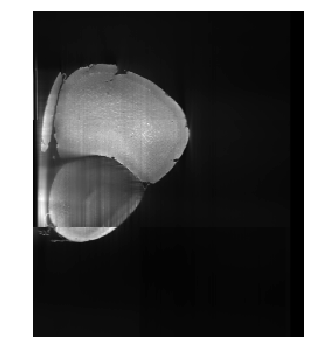

In [38]:
show(img)

In [39]:
import scipy
rotated = scipy.ndimage.rotate(img,7)

In [40]:
rotated.shape

(306, 264)

In [41]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

kernel_sharpening_x = np.array([[-1,0,-1], 
                              [-1, 9,-1],
                              [-1,0,-1]])

In [42]:
sharpened = scipy.ndimage.convolve(rotated, kernel_sharpening,mode='constant')

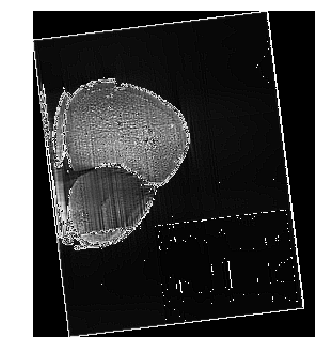

In [43]:
show(sharpened)

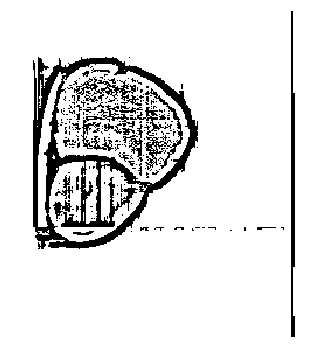

In [44]:
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
show(th2)

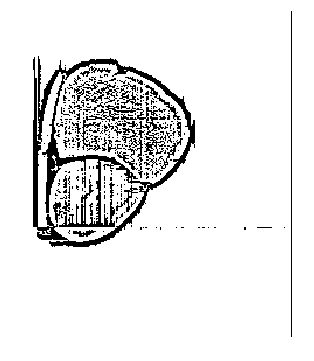

In [45]:
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
show(th3)

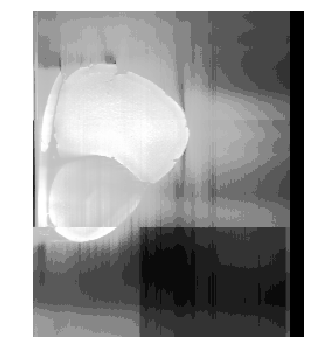

In [46]:
show(cv.equalizeHist(img))

In [47]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

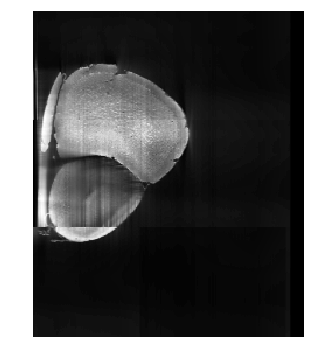

In [48]:
show(cl1)

In [49]:
bigmask = cv.compare(img,np.uint8([127]),cv.CMP_GE)
smallmask = cv.bitwise_not(bigmask)

x = np.uint8([90])
big = cv.add(img,x,mask = bigmask)
small = cv.subtract(img,x,mask = smallmask)
res = cv.add(big,small)

error: OpenCV(3.4.2) /io/opencv/modules/core/src/arithm.cpp:661: error: (-215:Assertion failed) type2 == 6 && (sz2.height == 1 || sz2.height == 4) in function 'arithm_op'


In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.imread('images/flicker2.jpg',0)
img = cv.imread('0093.png')#[:,:,0]
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# calculate amplitude spectrum
mag_spec = 20*np.log(np.abs(fshift))

r = f.shape[0]/2        # number of rows/2
c = f.shape[1]/2        # number of columns/2   
p = 3                         
n = 1                   # to suppress all except for the DC component       
fshift2 = np.copy(fshift)

# suppress upper part
fshift2[0:r-n , c-p:c+p] = 0.001
# suppress lower part
fshift2[r+n:r+r, c-p:c+p] = 0.001
# calculate new amplitude spectrum
mag_spec2 = 20*np.log(np.abs(fshift2))
inv_fshift = np.fft.ifftshift(fshift2)
# reconstruct image
img_recon = np.real(np.fft.ifft2(inv_fshift))

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mag_spec, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(mag_spec2, cmap = 'gray')
plt.title('Magnitude Spectrum after suppression'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_recon, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


TypeError: slice indices must be integers or None or have an __index__ method

In [51]:
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.95)
pca.fit(img[:,:,0])
train_img = pca.transform(img[:,:,0])

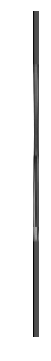

In [52]:
show(train_img)

In [53]:
pca = PCA(.99)
lower_dimensional_data = pca.fit_transform(img[:,:,0])
pca.n_components_
approximation = pca.inverse_transform(lower_dimensional_data)



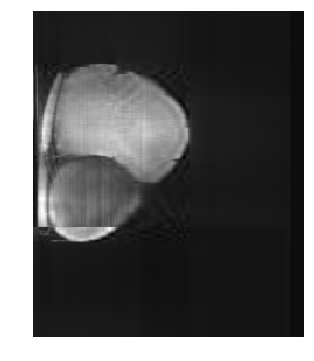

In [54]:
show(approximation)

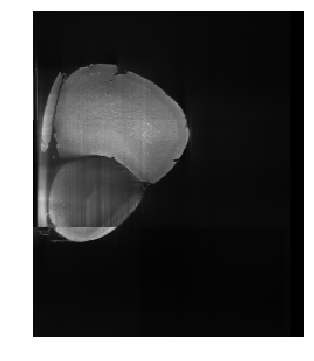

In [55]:
show(img)

In [56]:
filtered = pca.inverse_transform(components)

NameError: name 'components' is not defined

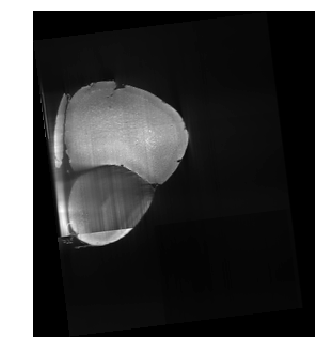

In [57]:
show(rotated)

In [58]:
rotated.shape

(306, 264)

In [59]:
roi = rotated[60:230,:50]

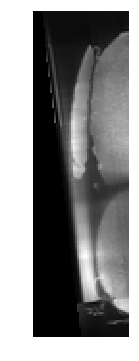

True

In [60]:
show(roi)
cv.imwrite('roi.png',roi)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as misc
import skimage.filters

In [74]:
img = misc.imread('roi.png', flatten=1)
def plot_PCA(img):
    y, x = np.nonzero(img)
    x = x - np.mean(x)
    y = y - np.mean(y)
    coords = np.vstack([x, y])
    cov = np.cov(coords)
    evals, evecs = np.linalg.eig(cov)
    sort_indices = np.argsort(evals)[::-1]
    x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
    x_v2, y_v2 = evecs[:, sort_indices[1]]
    scale = -20
    plt.plot([0, x_v1*scale*2],
         [0, y_v1*scale*2], color='red')
    plt.plot([0, x_v2*scale],
         [0, y_v2*scale], color='blue')
    #plt.plot(x, y, 'k.')
    plt.axis('equal')
    plt.gca().invert_yaxis()  # Match the image system with origin at top left
    plt.show()
    img.max()
    img.shape
    fig, ax = plt.subplots()
    #x = range(300)
    ax.imshow(img)
    ax.plot([0, x_v1*scale*2],
         [0, y_v1*scale*2], color='red')
    ax.plot([0, x_v2*scale],
         [0, y_v2*scale], color='blue')
    #ax.plot(x, x, '--', linewidth=5, color='firebrick')
    return

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [90]:
def plot_PCA_3D(img,img2):
    y, x, z = np.nonzero(img)
    x_m, y_m, z_m = [np.mean(i) for i in [x,y,z]]
    x = x - np.mean(x)
    y = y - np.mean(y)
    z = z - np.mean(z)
    coords = np.vstack([x, y, z])
    cov = np.cov(coords)
    evals, evecs = np.linalg.eig(cov)
    sort_indices = np.argsort(evals)[::-1]
    x_v1, y_v1, z_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
    x_v2, y_v2, z_v1 = evecs[:, sort_indices[1]]
    scale = 20
    plt.plot([x_m, x_m + x_v1*scale*2],
         [y_m,y_m + y_v1*scale*2], color='red')
    plt.plot([x_m, x_m + x_v2*scale],
         [y_m, y_m + y_v2*scale], color='blue')
    #plt.plot(x, y, 'k.')
    plt.axis('equal')
    plt.gca().invert_yaxis()  # Match the image system with origin at top left
    plt.show()
    img.max()
    img.shape
    fig, ax = plt.subplots()
    #x = range(300)
    ax.imshow(img2)
    ax.plot([x_m +0, x_m +x_v1*scale*2], [y_m +0, y_m +y_v1*scale*2], color='red')
    ax.plot([x_m + 0, x_m + x_v2*scale], [y_m +0, y_m +y_v2*scale], color='blue')
    #ax.plot(x, x, '--', linewidth=5, color='firebrick')
    return [x_v1, y_v1]

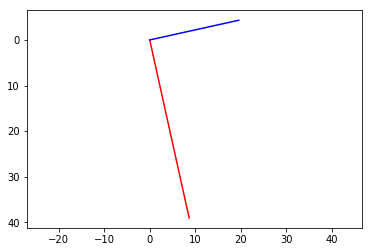

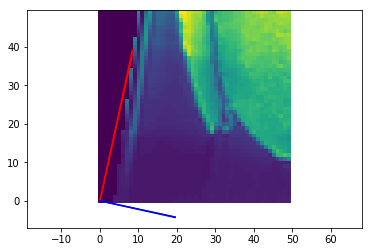

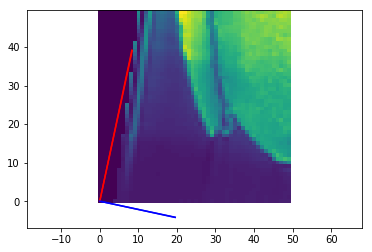

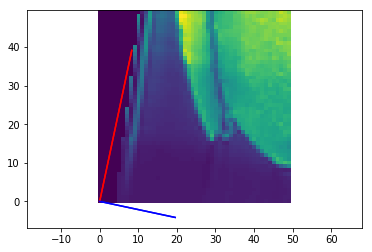

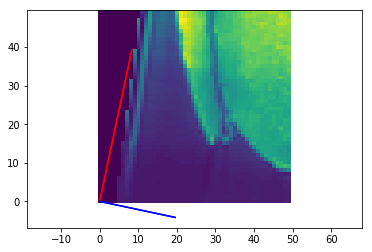

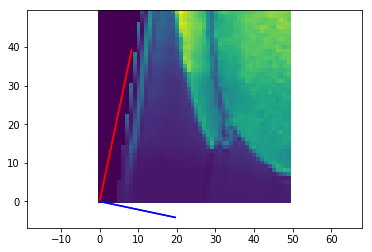

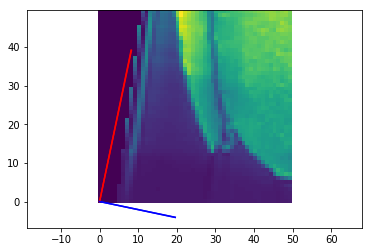

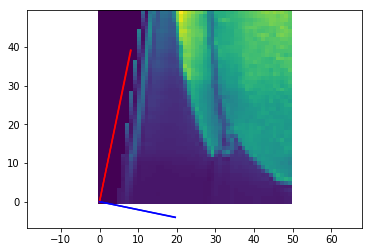

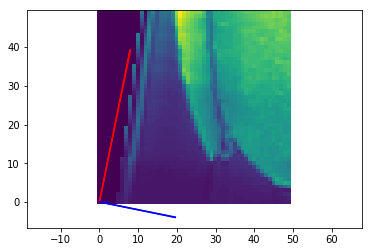

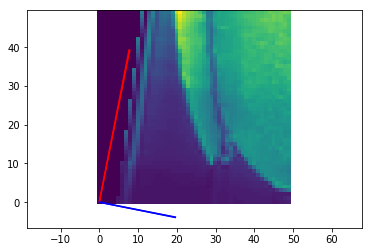

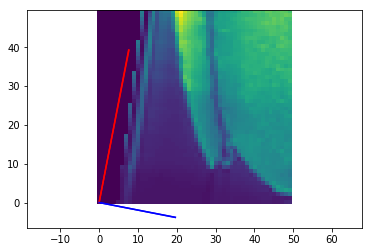

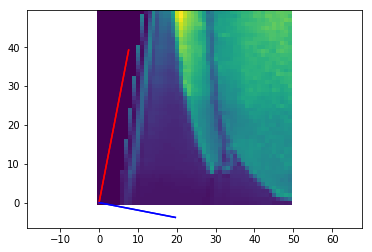

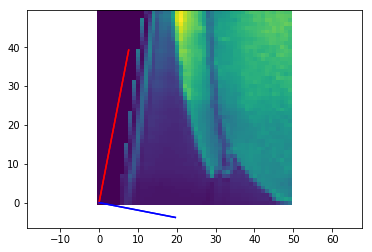

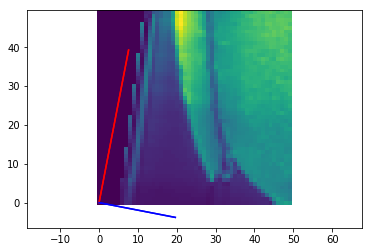

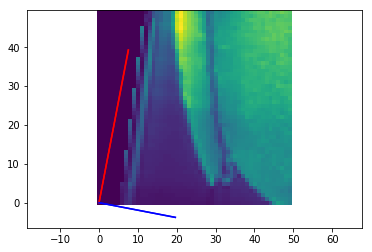

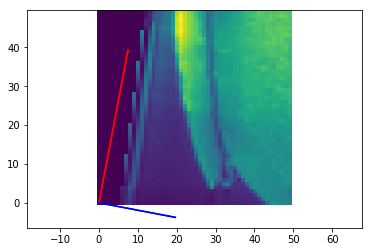

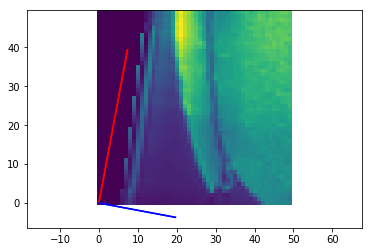

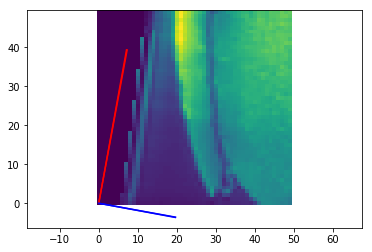

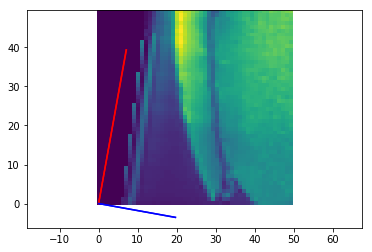

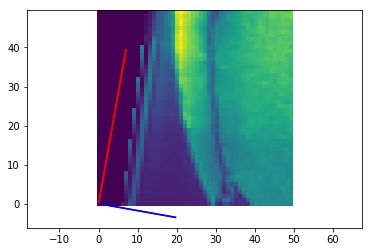

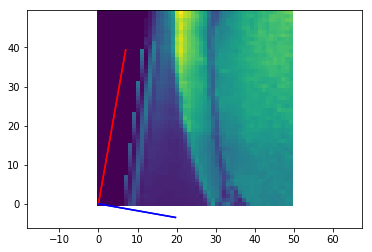

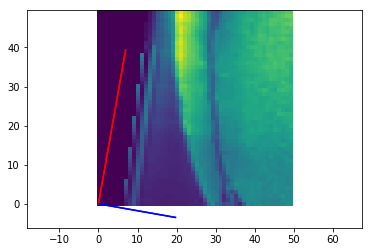

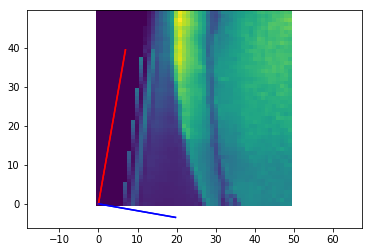

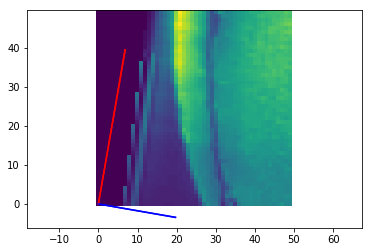

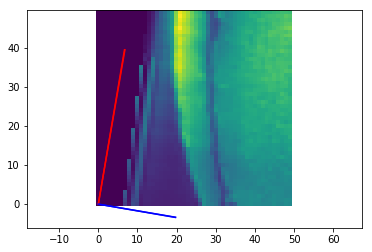

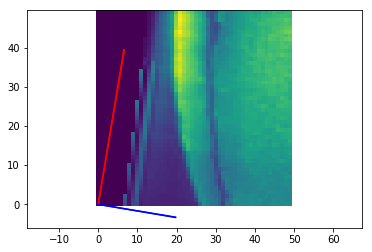

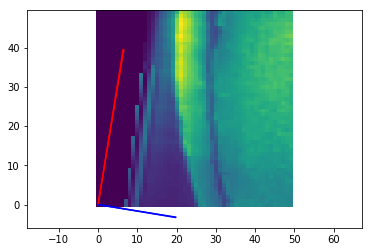

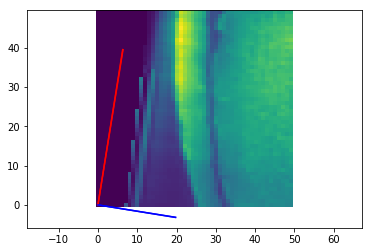

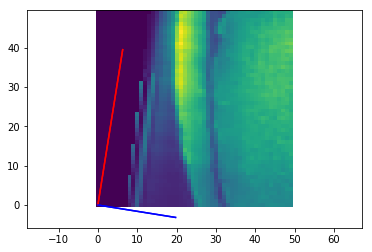

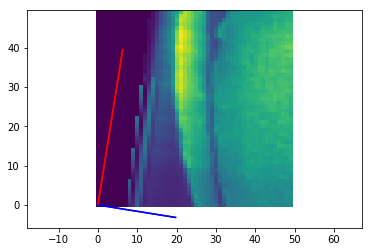

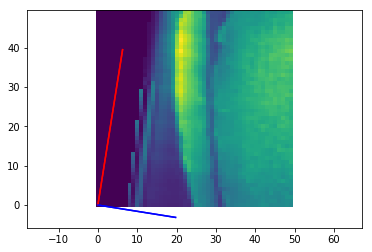

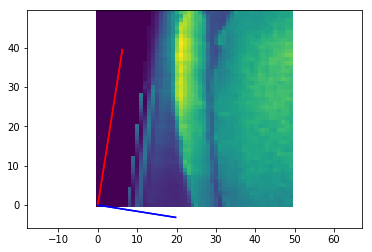

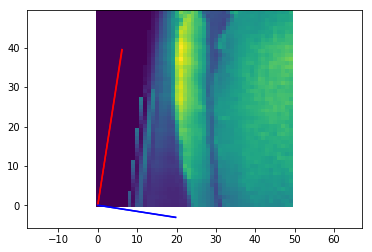

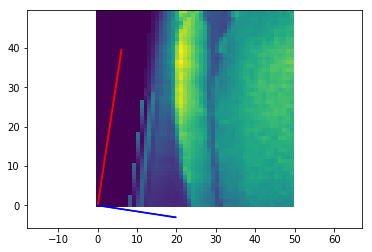

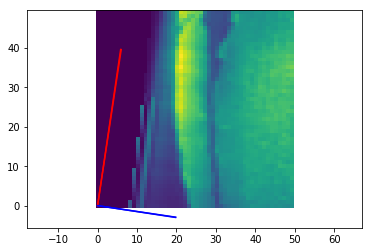

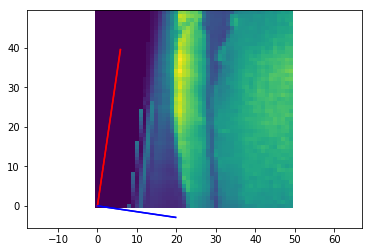

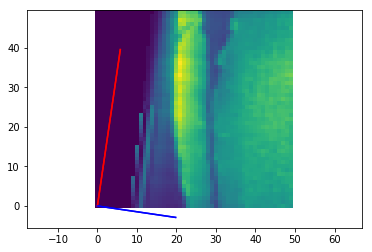

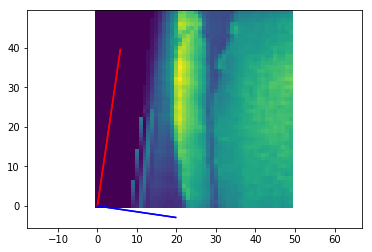

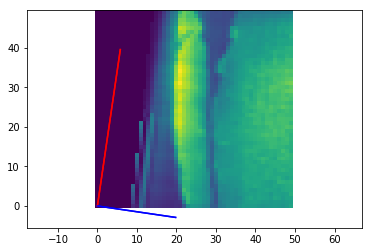

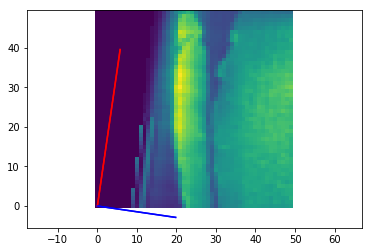

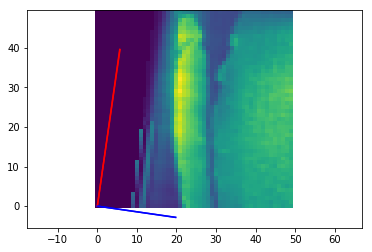

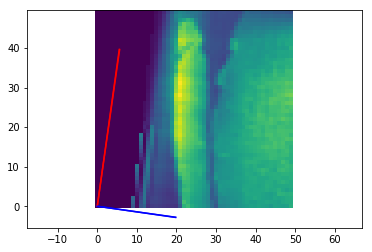

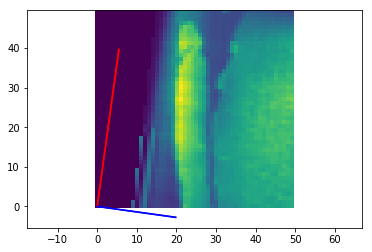

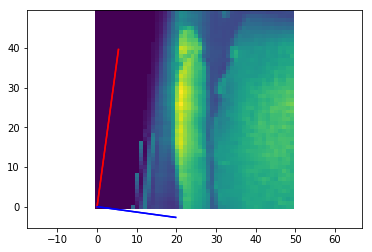

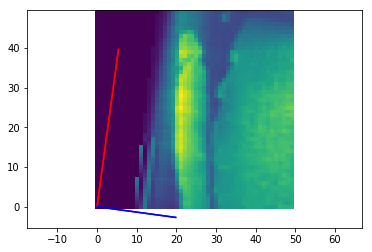

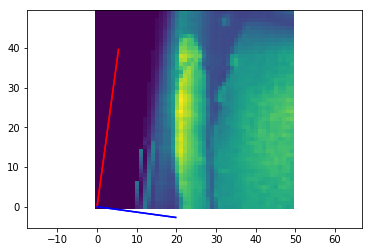

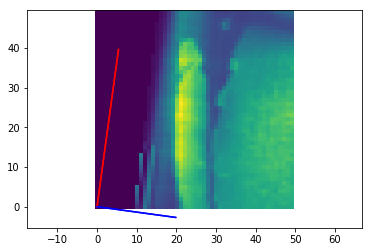

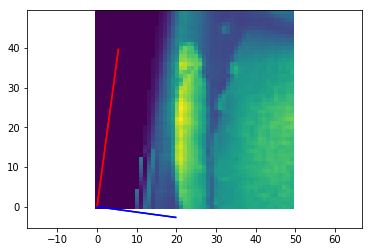

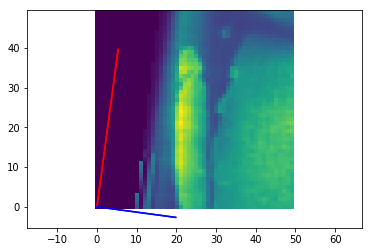

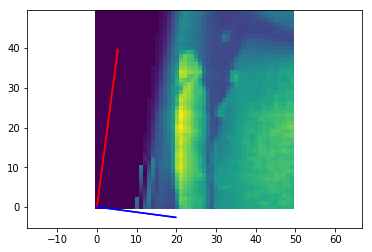

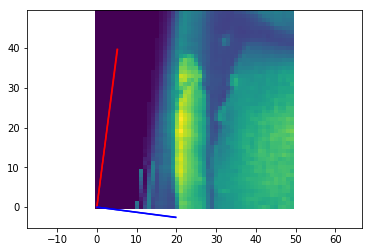

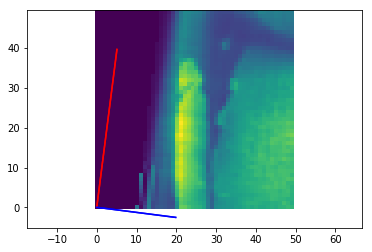

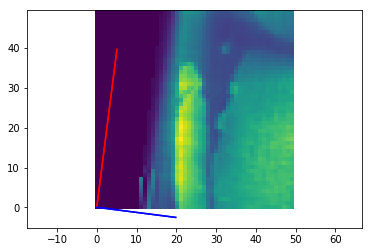

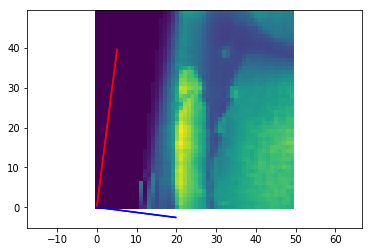

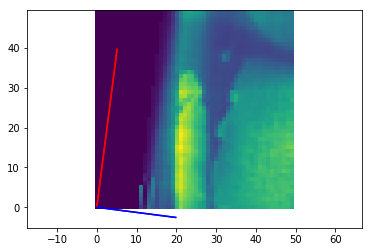

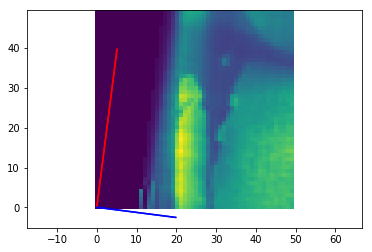

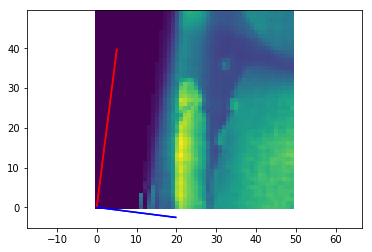

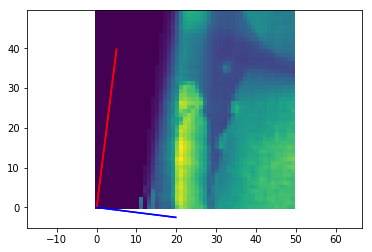

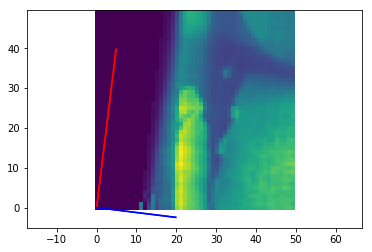

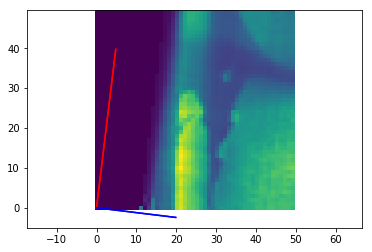

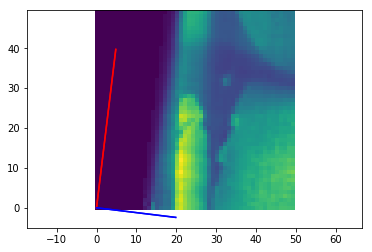

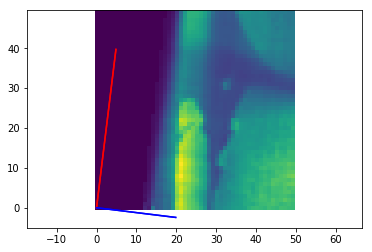

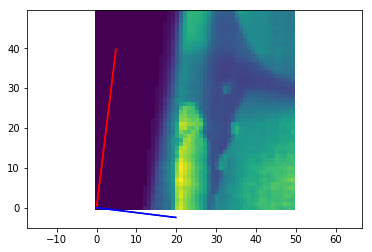

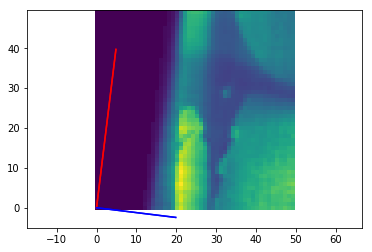

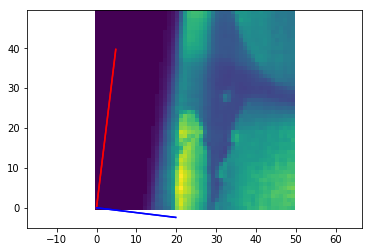

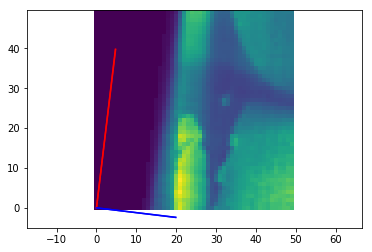

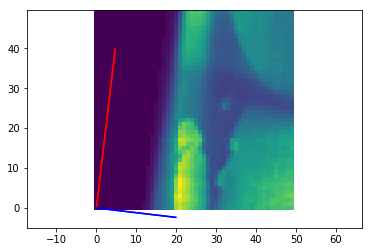

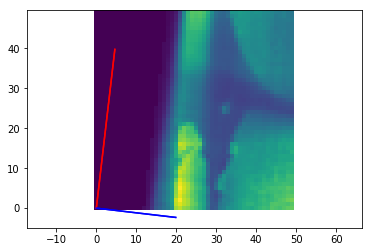

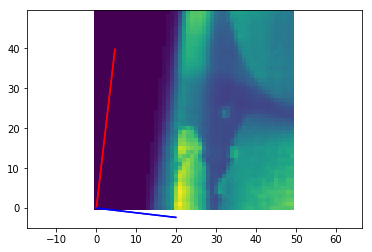

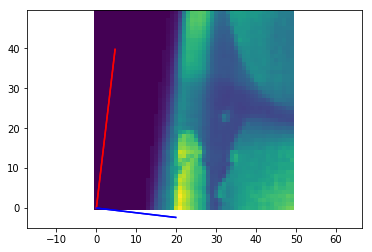

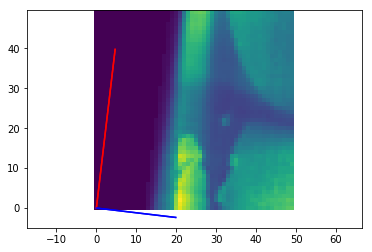

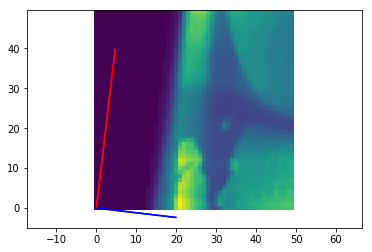

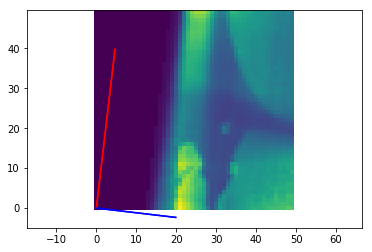

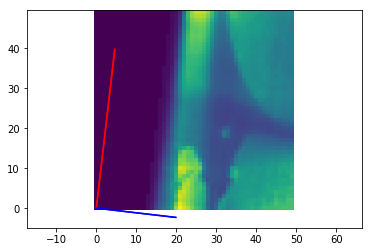

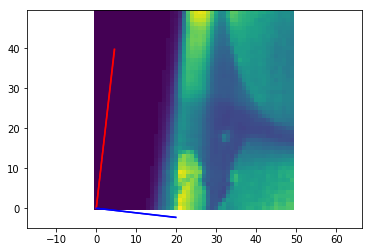

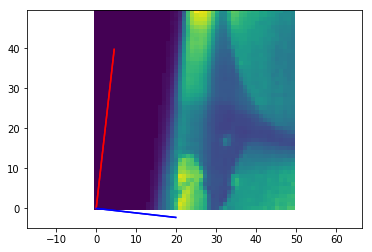

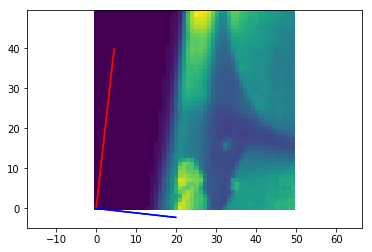

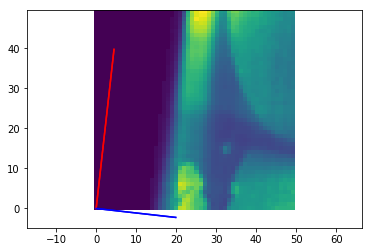

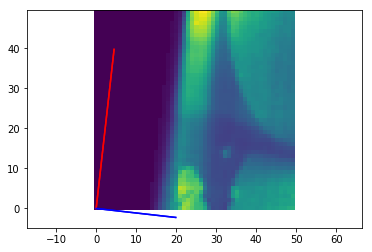

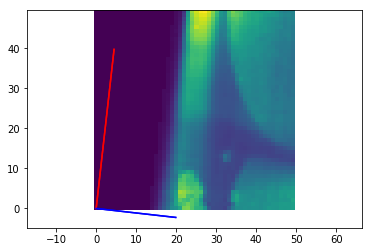

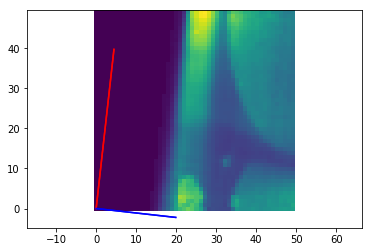

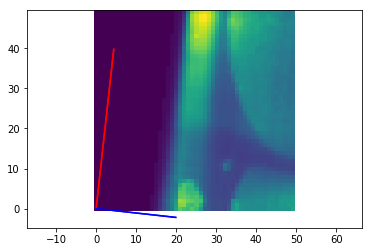

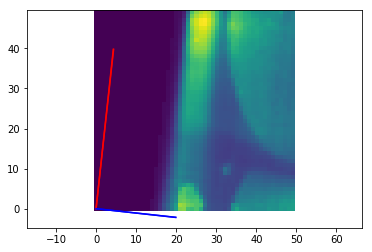

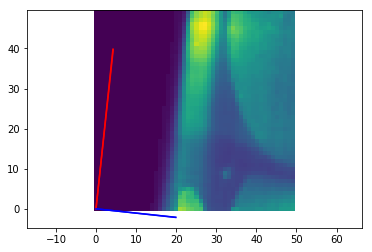

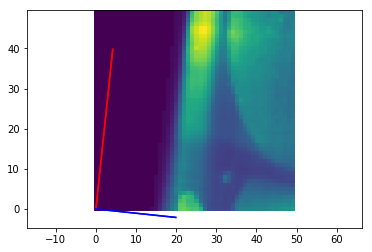

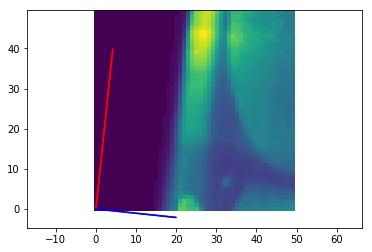

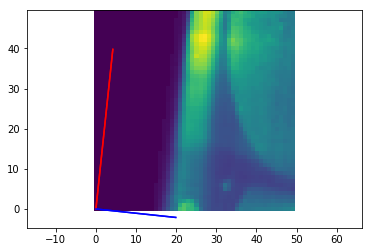

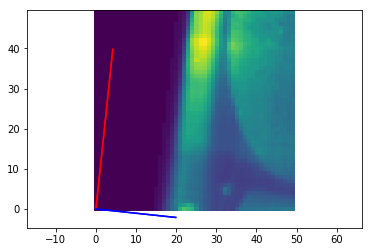

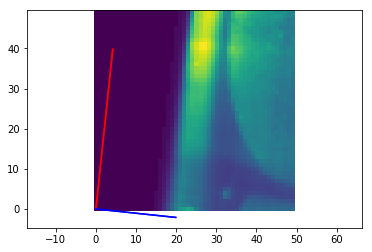

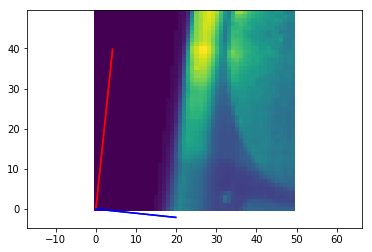

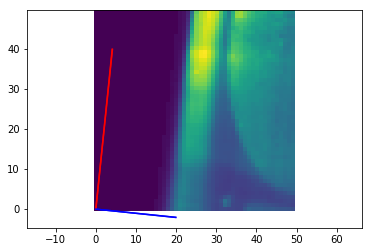

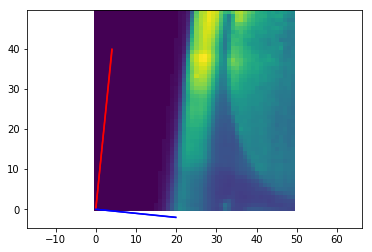

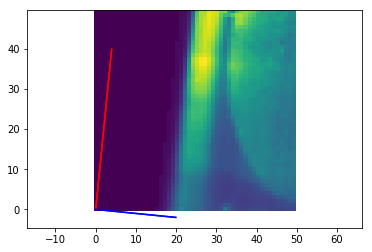

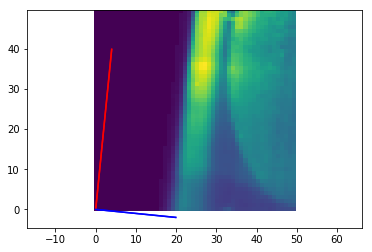

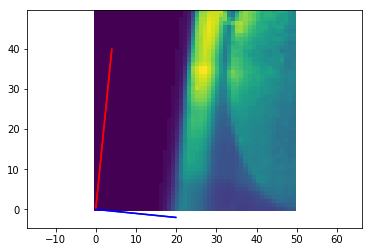

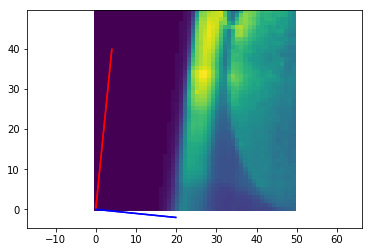

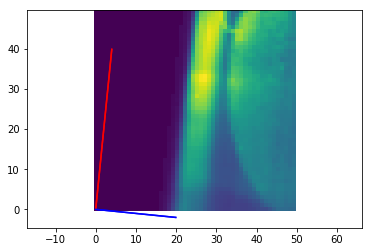

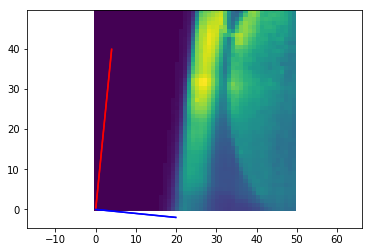

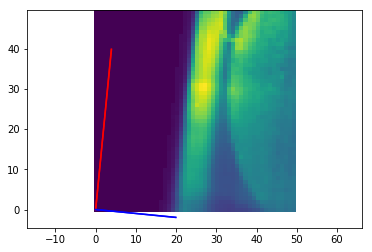

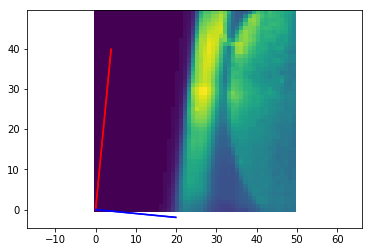

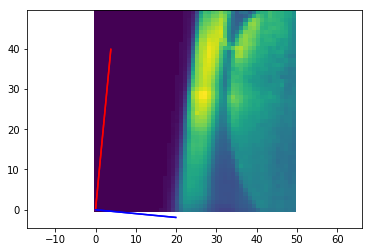

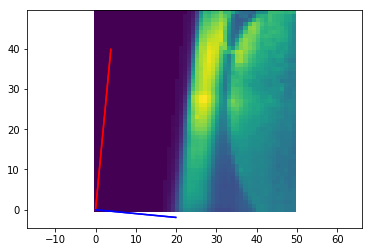

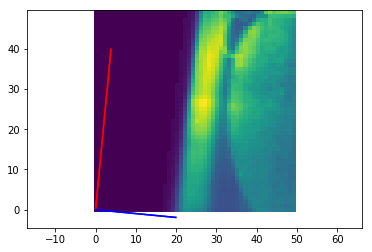

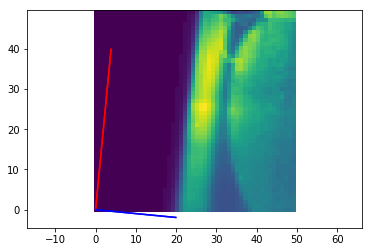

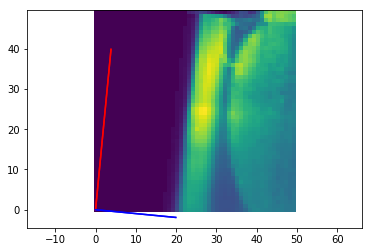

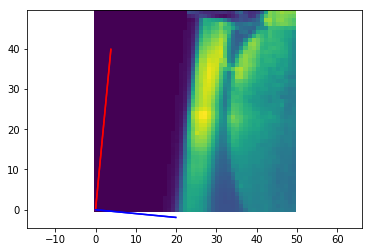

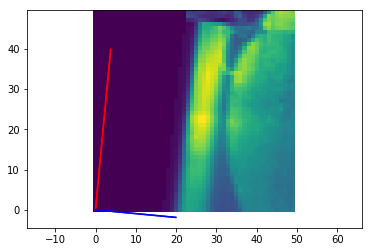

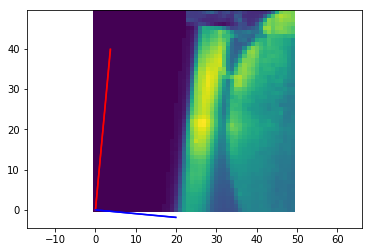

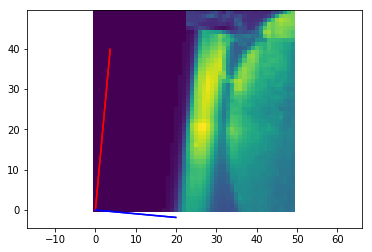

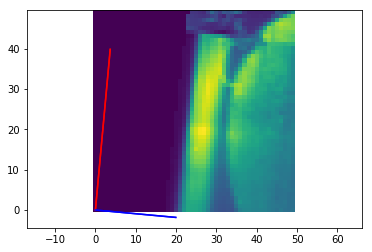

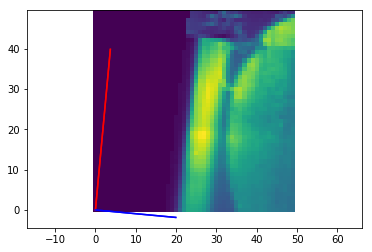

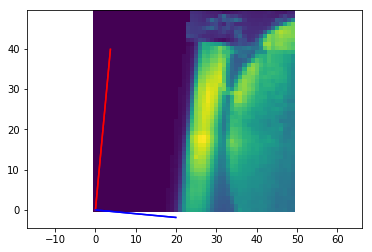

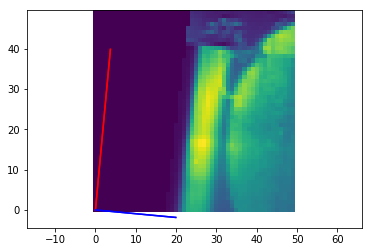

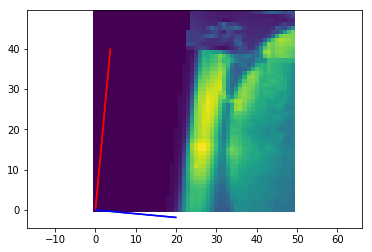

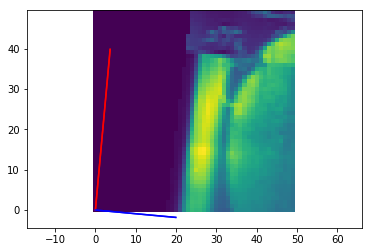

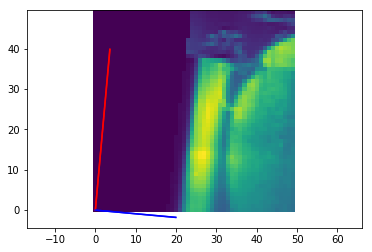

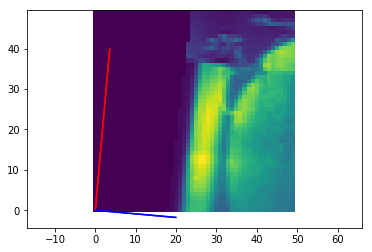

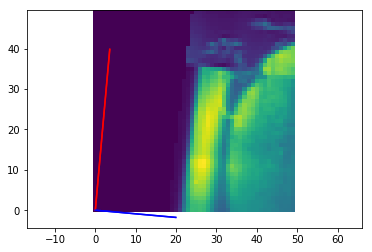

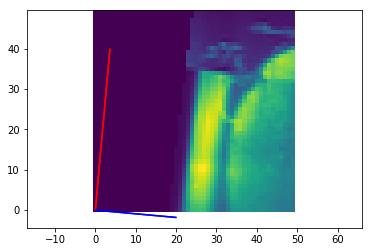

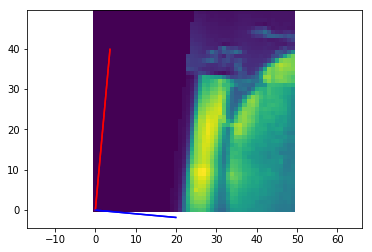

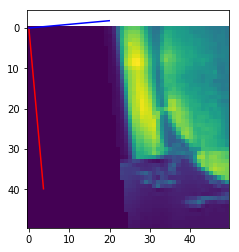

In [76]:
for i in range(img.shape[0]-50):
    img_min = img[i:i+50,:]
    plot_PCA(img_min)

FigureCanvasNbAgg()

FigureCanvasNbAgg()

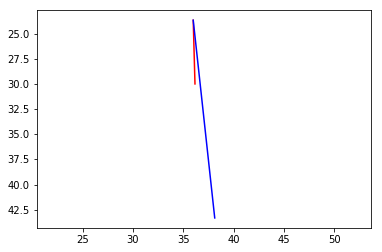

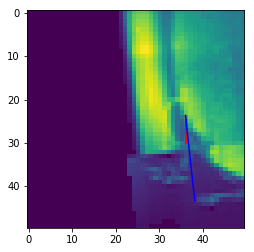

In [92]:
arr_3D = np.zeros([img_min.shape[0],img_min.shape[1],int(img_min.max())+1])
mask = img_min < 10
img_min[mask] = 0
for i in range(img_min.shape[0]):
    for j in range(img_min.shape[1]):
        if int(img_min[i,j]) > 0:
            arr_3D[i,j,int(img_min[i,j])] = 1
            
        #print(i,j,int(img_min[i,j])-1)
vec = plot_PCA_3D(arr_3D,img_min)

In [88]:
#np.zeros([1,1])

array([[0.]])

In [93]:
vec

[0.004348241609966413, 0.1581076600847725]

In [98]:
ang = np.arctan2(vec[0],vec[1])*360/(2*np.pi)

In [107]:
img_min_rotated = scipy.ndimage.rotate(img_min,-ang)

FigureCanvasNbAgg()

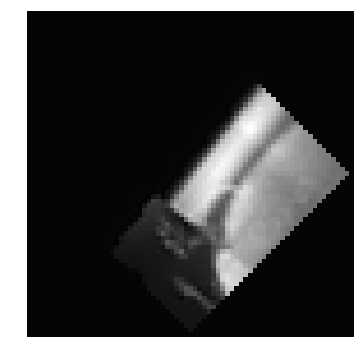

In [106]:
show(scipy.ndimage.rotate(img_min,-45))

FigureCanvasNbAgg()

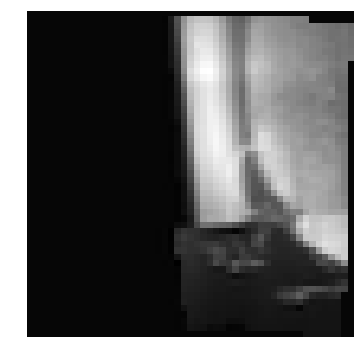

In [108]:
show(img_min_rotated)
img_min_rotated[]

In [114]:


show(img_min[y_m -y_window: y_m+y_window,;])

SyntaxError: invalid syntax (<ipython-input-114-48c3739bad40>, line 5)

FigureCanvasNbAgg()

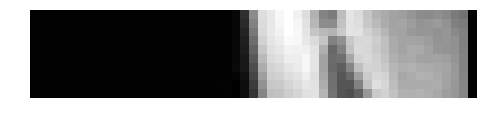

In [122]:
show(img_min_rotated[int(round(y_m))-5:int(round(y_m))+5,:])

FigureCanvasNbAgg()

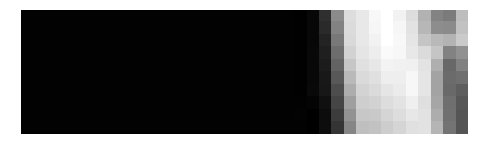

In [124]:
show(img_min_rotated[int(round(y_m))-5:int(round(y_m))+5, 0:int(round(x_m))])

In [138]:
def calc_dev(arr_3D, img_min_rotated, epsilon=0):
    y, x, z = np.nonzero(arr_3D)
    x_m, y_m, z_m = [np.mean(i) for i in [x,y,z]]
    #epsilon = 0
    #arr_3D y_m
    y_window = 5
    x_pos = int(round(x_m)) + epsilon
    left_points = img_min_rotated[int(round(y_m))-5:int(round(y_m))+5, 0:x_pos]
    mask = img_min_rotated<10
    img_min_rotated[mask] = 0
    y,x = np.nonzero(left_points)
    sum_diff = 0.0
    for i in range(y.shape[0]):
        diff = img_min_rotated[y[i],x[i]] - img_min_rotated[y[i], x_pos + x_pos - x[i]] 
        sum_diff += diff**2
    sum_diff = (sum_diff)**(0.5)/y.shape[0]
    return sum_diff

In [119]:
round(y_m)

24.0

In [117]:
y_m

23.682835820895523

In [154]:
calc_dev(arr_3D, img_min_rotated, epsilon=-4)

4.1106324786019055

In [155]:
x_m - 4

31.984328358208955

FigureCanvasNbAgg()

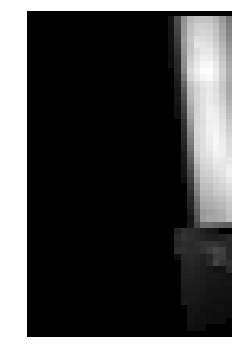

In [156]:
show(img_min_rotated[:,0:32])

FigureCanvasNbAgg()

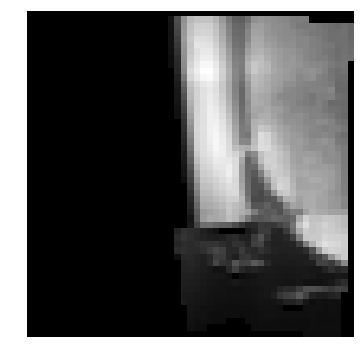

In [158]:
show(img_min_rotated)

FigureCanvasNbAgg()

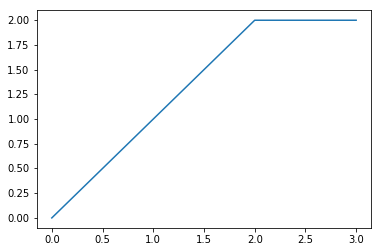

In [85]:
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt

plt.plot([0, 1, 2, 2])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_3D(arr_3D):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    y,x,z = np.nonzero(arr_3D)
    #z = (np.ones(np.size(u)),
    ax.scatter(x, y, z,marker='^',c=z, cmap=plt.cm.autumn)
    #ax.plot_surface(x, y, z, color='b')

In [ ]:
show(img_min>175)

In [ ]:
img_min

### pocisnąć optymalizację parametru b

dla kazdej wartości b w jakims zakresie (np. 0,50).
policzyc
dla kazdego punktu P(x,y,z) takiego ze y > ax + b (dla a>=0)
                                    albo y < ax + b (dla a<0)

bierzemy punkt:
P'(x',y',z') taki ze wektor vec(P,P') = 2*vecP(P do ax+b)

mierzymy diff_z = (z'-z)**2

sumujemy diff_z

i robimy (diff_z)**(1/2)

i moze dzielimy to przez len(Ps) albo len(Ps**2).
albo mnozymy przez exp-(len(Ps)), nie wiem.
albo dzielimy przez ln(len(Ps))
jesli P' nie istnieje, to bierzemy z'=0 (sprobujmy)
i minimalizujemy to (zobaczymy jakie wyniki to da)

potem (druga godzina) sprawdzimy jak to robi ten program symmetry (te votes i w ogole) (optymalizacja paramteru r dla stalej theta)